<a href="https://colab.research.google.com/github/Stanleynjoroge/spatial_deep_learning/blob/main/Model4RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Index(['Rowid_', 'FID', 'COUNT', 'AREA', 'MIN', 'MAX', 'RANGE', 'MEAN', 'STD',
       'SUM'],
      dtype='object')
Mean Squared Error: 9.080628180823947e-08
Root Mean Squared Error: 0.0003013408067425311
R-squared: 0.9999784893826924


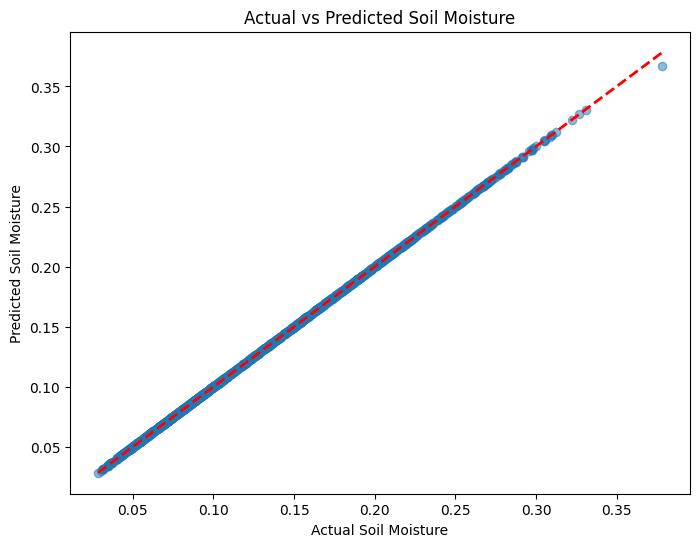

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from google.colab import drive # Import drive from google.colab
import matplotlib.pyplot as plt
import numpy as np

# Mount Google Drive
drive.mount('/content/drive')
# Assuming your SMAP data is in a CSV file named 'smap_data.csv'
# Replace with your actual file path
data = pd.read_csv('/content/drive/MyDrive/Data/Kenya_soil_Data.csv')

# Print the available columns in the DataFrame to confirm the correct name
print(data.columns)

# Data preprocessing
# Correct the column name to 'mean' if necessary based on the printed columns
data = data.dropna(subset=['MEAN'])  # Drop rows where 'mean' is null

X = data.drop(columns=['MEAN', 'FID'])  # Adjust based on your actual column names
y = data['MEAN']  # Target variable (Mean Soil Moisture)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

# Visualize predictions vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Diagonal line
plt.xlabel('Actual Soil Moisture')
plt.ylabel('Predicted Soil Moisture')
plt.title('Actual vs Predicted Soil Moisture')
plt.show()
